## Random walk

We simulate a simple random walk in $d$ dimensions. In a first implementation, the steps have a fixed length $\delta$ along each dimension. To improve the statistics, we simulate $M$ independent walks at a time, and average the mean square displacement $\langle |\Delta \vec{r}|^2\rangle$ over the different realizations of the walk.

In [1]:
import numpy
import matplotlib.pyplot as plt

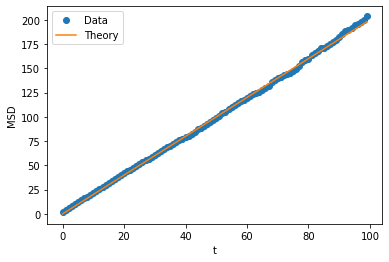

In [2]:
# Number of steps
N = 100
# Number of walks
M = 1000
# Number of dimensions
dims = 2
# Size of step
delta = 1.0

# The initial position is the origin
position = numpy.zeros((M, dims))

# Create random number generator
rng = numpy.random.default_rng(12345)

# Random walk
msd = []
for i in range(N):
    for p in position:
        # Fixed displacement
        dr = delta * rng.choice([-1, 1], size=dims)
        p += dr
    msd.append(numpy.sum(position**2) / M)

time = numpy.array(range(N))
plt.plot(time, msd, 'o', label='Data')
plt.plot(time, dims * delta**2 * time, '-', label='Theory')
plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

**Exercise 1**: plot the trajectory $\vec{r}(t) = (x(t), y(t))$ of a single walk in 2d 

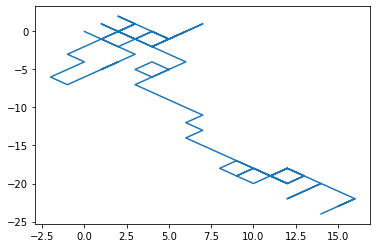

In [3]:
# Number of dimensions
dims = 2
# Number of steps
N = 100

# The initial position is the origin
position = numpy.zeros(dims)

# Create random number generator
rng = numpy.random.default_rng(12345)

# Random walk
x = [0]
y = [0]
for i in range(N):
    # Fixed displacement
    dr = delta * rng.choice([-1, 1], size=dims)
    position += dr
    x.append(position[0])
    y.append(position[1])

plt.plot(x, y)

Controllo che esecuzioni successive diano la stessa traiettoria

In [4]:
# The initial position is the origin
position = numpy.zeros(dims)

# Create random number generator
rng = numpy.random.default_rng(12345)

x_trial = [0]
y_trial = [0]
for i in range(N):
    # Fixed displacement
    dr = delta * rng.choice([-1, 1], size=dims)
    position += dr
    x_trial.append(position[0])
    y_trial.append(position[1])
    
if x_trial != x or y_trial != y:
    print("WARNING: different trajectory")
else:
    print("Results are reproducible")

Results are reproducible


**Exercise 2**: code the following two kinds of displacements

1. discrete north-south-east-west displacement in 2d
2. continuous displacement uniformly distributed on a square of side $\delta$ in 2d

For each case, compare the numerical data to the theoretical prediction.

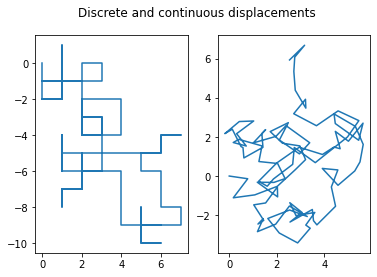

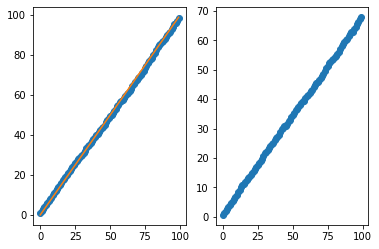

In [5]:
# Number of steps
N = 100
# Number of dimensions
dims = 2

# Create random number generator
rng = numpy.random.default_rng(12345)

# The initial position is the origin
position = numpy.zeros((M,dims))

# Random walk
x = [0]
y = [0]
msd = []
for i in range(N):
    for p in position:
        # North-south-est-west displacement
        rnd = rng.choice([-1, 1])
        dr = delta * rng.choice([-1, 1])
        if rnd == -1:
            p[0] += dr
        else:
            p[1] += dr
    x.append(position[0][0])
    y.append(position[0][1])
    msd.append(numpy.sum(position**2) / M)

    
# Initial position
position1 = numpy.zeros((M, dims))

# Random walk
x1 = [0]
y1 = [0]
msd1 = []
for i in range(N):
    for p in position1:
        # Uniform continuous displacement
        dr = delta * rng.uniform(-1, 1, size=dims)
        p += dr
    x1.append(position1[0][0])
    y1.append(position1[0][1])
    msd1.append(numpy.sum(position1**2) / M)


# Traiettorie di un singolo camminatore
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Discrete and continuous displacements')
ax1.plot(x, y)
ax2.plot(x1, y1)

# Verifico andamento lineare in N
fig1, (a1, a2) = plt.subplots(1, 2)
time = numpy.array(range(N))
a1.plot(time, msd, 'o', label='Data')
a1.plot(time, delta*time, '-')
a2.plot(time, msd1, 'o', label='Data')

Controllo che esecuzioni successive diano le stesse traiettorie

In [6]:
# Create random number generator
rng = numpy.random.default_rng(12345)

# Initial position
trial_position = numpy.zeros((M,dims))

# Random walk
for i in range(N):
    for p in trial_position:
        # North-south-est-west displacement
        rnd = rng.choice([-1, 1])
        dr = delta * rng.choice([-1, 1])
        if rnd == -1:
            p[0] += dr
        else:
            p[1] += dr


# Initial position
trial_position1 = numpy.zeros((M, dims))

# Random walk
for i in range(N):
    for p in trial_position1:
        # Uniform continuous displacement
        dr = delta * rng.uniform(-1, 1, size=dims)
        p += dr

    
if not (trial_position == position).all():
    print("NSEW displacement: different trajectories")
else:
    print("NSEW displacement: results are reproducible")

if not (trial_position1 == position1).all():
    print("Uniform continuous displacement: different trajectories")
else:
    print("Uniform continuous displacement: results are reproducible")

NSEW displacement: results are reproducible
Uniform continuous displacement: results are reproducible


**Exercise 3**: measure the probability density function (pdf) $p(x,t)$ for a random walk in 1d with a uniformly distributed displacement on the interval $[-\delta, \delta]$. Choose $10$ time units and compare to the numerical results to the theoretical prediction for a random walk in the continuum limit.

*Hint*: to compute the pdf, use the function `numpy.histogram()` with `density=True`. The function returns the pdf values and the bins edges. The get the midpoints of the bins, modify the array like this ```bins = 0.5 * (bins[1:] + bins[:-1])```

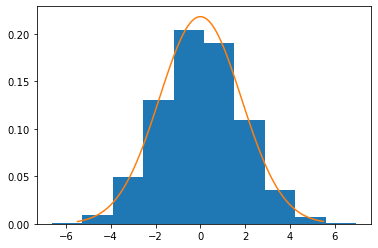

In [7]:
import scipy.stats as stats

# Number of steps
N = 10
# Number of walks
M = 10000
# Number of dimensions
dims = 1

# The initial position is the origin
position = numpy.zeros((M, dims))

# Create random number generator
rng = numpy.random.default_rng(12345)

# Random walk
for i in range(N):
    for p in position:
        # Fixed displacement
        dr = delta * rng.uniform(-1, 1, size=dims)
        p += dr
msd = numpy.sum(position**2) / M


# Plot histogram
plt.hist(position, density=True)
x = numpy.linspace(-3*numpy.sqrt(msd), 3*numpy.sqrt(msd), 100)
plt.plot(x, stats.norm.pdf(x, 0, numpy.sqrt(msd)))
plt.show()

Controllo che esecuzioni successive diano la stessa traiettoria per ogni camminatore

In [8]:
# Create random number generator
rng = numpy.random.default_rng(12345)


trial_position = numpy.zeros((M, dims))

# Random walk
for i in range(N):
    for i in range(len(trial_position)):
        # Fixed displacement
        dr = delta * rng.uniform(-1, 1, size=dims)
        trial_position[i] += dr
        
if not (trial_position == position).all():
    print("Different trajectories")
else:
    print("Results are reproducible")

Results are reproducible


Calcolo la varianza dello spostamento quadratico medio su 1000 RW e verifico che risultati successivi siano compatibili con il risultato, confrontanto i risultati di N_iter successive iterazioni con la varianza ottenuta.

In [22]:
# Number of steps
N = 50
# Number of walks
M = 1000

# Create random number generator
rng = numpy.random.default_rng()


# Initial position
position = numpy.zeros((M, dims))

# Random walk "di riferimento"
for i in range(N):
    for p in position:
        # Uniform continuous displacement
        dr = delta * rng.uniform(-1, 1, size=dims)
        p += dr
for p in position:
    msd += (p**2)
msd = msd / M
var = msd / numpy.sqrt(M)

print("spostamento quadratico medio <R^2>: ", msd, "\n varianza: ", var)
                       

    
differ = []

# N_iter iterazioni successive confrontate con il risultato "di riferimento"
N_iter = 1000

for k in range(N_iter):
    msd1 = 0
    # Initial position
    position = numpy.zeros((M, dims))

    # Random walk
    for i in range(N):
        for p in position:
            # Uniform continuous displacement
            dr = delta * rng.uniform(-1, 1, size=dims)
            p += dr
    for p in position:
        msd1 += (p**2)
    msd1 = msd1 / M
    differ.append(abs(msd1 - msd))


    counter = 0
for diff in differ:
    if diff < 3*var:
        counter += 1
        
print("risultati entro 3 sigma: ", counter, " / ", N_iter)


spostamento quadratico medio <R^2>:  [16.0458568] 
 varianza:  [0.50741454]
risultati entro 3 sigma:  914  /  1000
